### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### Instructions given in class: (11/07)
Steps to be followed:
1. read csv files
2. explore dataset
3. evaluation 
4. split 
5. scale
6. model
-GridSearchCV - best parameters
-train, test score

Proj 3 (If you need head start):
7. ensemble
8. dimension reduction - repeat step 4 to 7
9. Deep learning

In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Dataset For Regression Task

In [2]:
Dataset = pd.read_csv('Twitter.data', header = None)  #Reading Regression Dataset

In [45]:
Dataset.info()

In [4]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [5]:
#Dataset.columns
Dataset[77].unique().astype(int)  #This is Dependent variable

array([   0,    0,    2, ..., 4960, 4618, 2129])

In [8]:
Dataset[77].value_counts()     #Count of rows with unique values

0.5        20770
1.0        19299
0.0        19094
1.5        17510
2.0        15254
2.5        13557
3.0        11920
3.5        10781
4.0         9594
4.5         8609
5.0         7926
5.5         7422
6.0         6760
6.5         6294
7.0         5888
7.5         5433
8.0         5273
8.5         4971
9.0         4692
9.5         4614
10.0        4287
10.5        4025
11.0        3956
11.5        3816
12.0        3713
12.5        3643
13.0        3457
13.5        3315
14.0        3275
14.5        3215
           ...  
3623.0         1
3584.5         1
14486.0        1
3621.0         1
3618.0         1
3617.0         1
14463.5        1
3614.5         1
3613.0         1
3611.5         1
4498.0         1
14427.5        1
9324.0         1
6791.0         1
3603.5         1
4500.0         1
3602.5         1
3599.5         1
3599.0         1
3597.0         1
6290.0         1
3593.0         1
3591.0         1
6798.5         1
3589.0         1
2834.0         1
3587.5         1
3150.0        

<IPython.core.display.Javascript object>


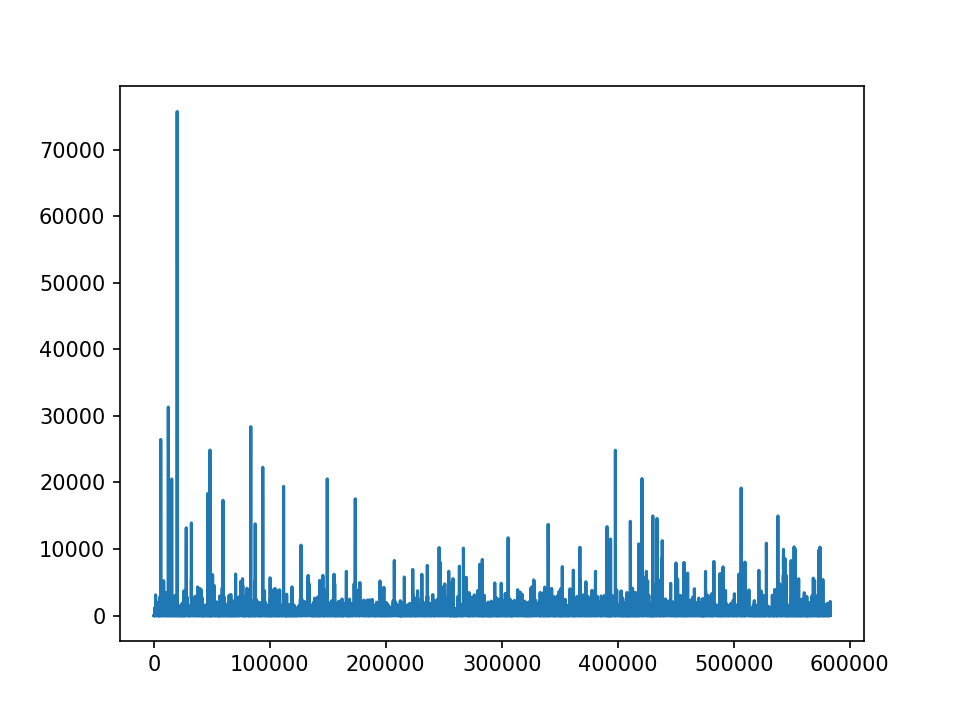

In [6]:
plt.plot(Dataset[77])

<IPython.core.display.Javascript object>


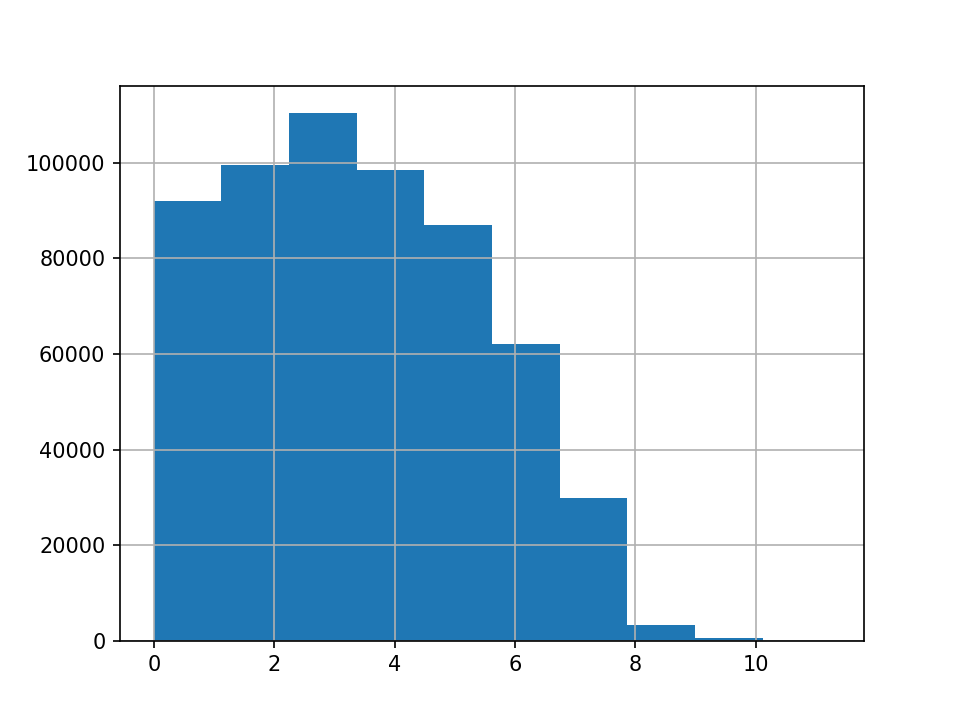

In [7]:
#Trying to understand distribution of dependent variable
np.log(Dataset[77]+1).hist()   #transforming to log and adding 1 to avoid -Inf
plt.show()

In [9]:
Dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [8]:
#Dataset.isnull().values.any()    #No Missing values
Dataset.isnull().sum().sum()  

0

The dataset does not have any missing values. Thus, no treatment is needed.
We have plotted correlation between variables below:

In [9]:
corr = Dataset.corr()    #calculate correlation matrix

<IPython.core.display.Javascript object>


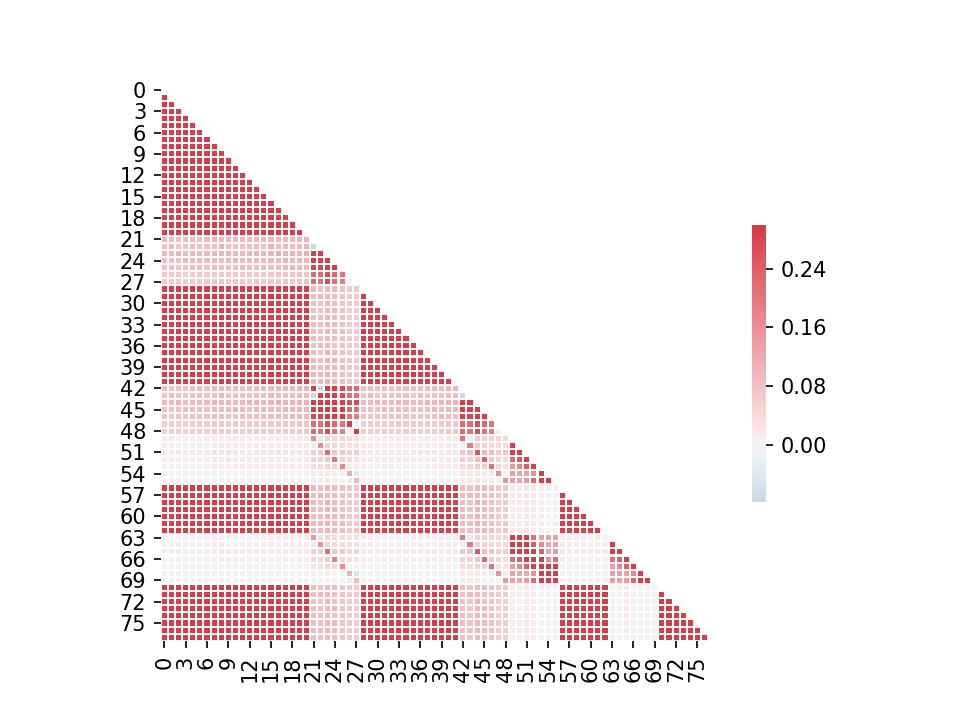

In [11]:
#Developing correlation plot

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Reading .names file
file = open("Twitter.names", "r")
for aline in file:
    #items = aline.split()
    print(aline)

### Taking a random sample and Pre-process data

In [41]:
subData = Dataset.sample(frac=0.01, random_state = 0)    #Selecting a random sample of data

In [42]:
subData.shape

(5832, 78)

In [43]:
#Separating dependent and independent vars
X = pd.DataFrame(subData.iloc[:,0:77])
Y = subData[77]

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,Y, random_state = 0)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test_org)
X_train =  pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

### K Nearest Regressor

Text(0,0.5,'MSE')

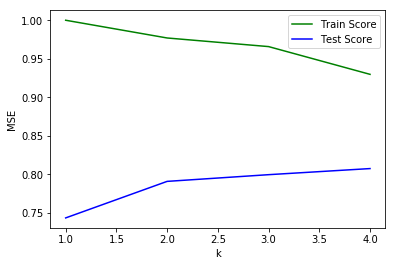

In [20]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,5):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,5)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('R^2')

In [22]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 2}

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Training R^2:", lreg.score(X_train, y_train))
print("Testing R^2:", lreg.score(X_test, y_test))

#Generate a beep to notify when code finishes running
import winsound
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

Training R^2: 0.9793403533486378
Testing R^2: 0.9211232269431326


### Polynomial Regression

I have fitted second order polynomial regression. Third order polynomial wasn't fitting even on a smaller dataset.

In [50]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
train_score = (lreg.score(X_train_poly, y_train))
test_score = (lreg.score(X_test_poly, y_test))
    
print(train_score)
print(test_score)


0.9997541889242582
-102458985197.03436


### RIDGE Regression

In [51]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

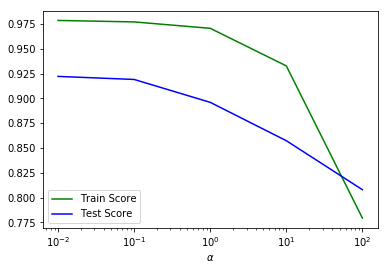

In [52]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [53]:
print(train_score_list)
print(test_score_list)

[0.9785944121615274, 0.9771073316530325, 0.970667418846555, 0.9327734649430002, 0.7793869040332426]
[0.9222037775477898, 0.9191255483906953, 0.8960670888453776, 0.8573952990938434, 0.8080246301635777]


In [54]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9788
Test score: 0.9223


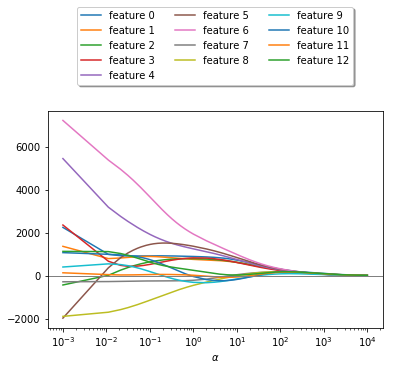

In [58]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()


### LASSO Regression

In [55]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [60]:
print(train_score_list)
print(test_score_list)

[0.9784472848250864, 0.975235498047488, 0.9651176286620482, 0.6834754263563485, 0.0]
[0.9185939139245253, 0.9243787834991992, 0.8958275685957389, 0.82145957312027, -8.23439428330186e-05]


Text(0.5,0,'$\\alpha$')

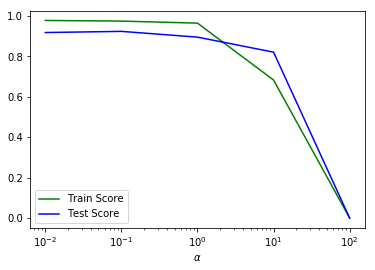

In [56]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


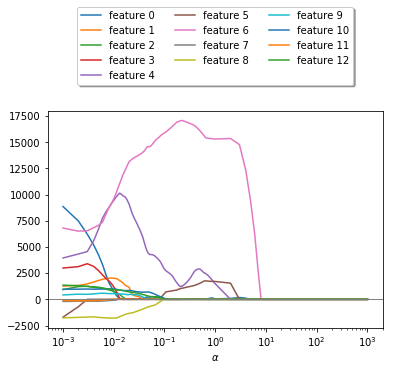

In [57]:
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### SGD Regressor

In [33]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 10000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))


-2795068.8907235162
-4682535.603934159


In [59]:
#Generate a beep to notify when code finishes running
import winsound
duration = 2500  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

##  Dataset For Classification Task

In [ ]:
#Dataset_2 = pd.read_csv('Twitter-Absolute-Sigma-500.data', header = None)   #Reading Data For classification

In [ ]:
#Dataset_2.info()

In [ ]:
#Dataset_2.head()

In [ ]:
#Dataset.columns
#Dataset_2[77].unique().astype(int)   #Dependent variable

In [ ]:
#Dataset_2.isnull().sum().sum()    #No Missing values